# Credit Card Fraud Transaction Classification
WonJae Lee, Feiyang Jiang

## Introduction

Transitioning from cash-based transactions to digital payments globally has amplified the challenge of credit card fraud in financial transactions, impacting consumers and institutions worldwide. The rapid evolution of information leaks and advancements in hacking techniques has led to increasingly sophisticated fraudulent activities, necessitating advanced detection methods to mitigate financial losses. Detecting fraudulent credit card transactions promptly is crucial for banks to protect customers from potential losses while ensuring seamless processing of legitimate transactions. While various other projects on this subject matter seek to investigate the performance of individual machine learning models from logistic regression to k-nearest neighbors to identify the likelihood of a transaction being fraudulent, this project aims to build on those discoveries and develop a robust credit card fraud detection model by analyzing key transaction features such as time, location, and amount. Leveraging machine learning algorithms and transaction data, we aim to identify patterns and anomalies indicative of fraudulent behavior, thereby enhancing fraud detection capabilities within the financial sector.

The dataset utilized for this project encompasses a comprehensive collection of credit card transactions, capturing crucial features including transaction timestamps, geographical locations, transaction amounts, and additional metadata associated with each transaction. This dataset serves as the cornerstone for training and testing machine learning models designed to differentiate between legitimate and fraudulent transactions. The dataset's richness in transactional details enables the development of predictive models capable of detecting suspicious patterns in real-time transactions, facilitating proactive measures to mitigate fraud risks and bolster overall transaction security.

## Method

In our project, we explored various classification algorithms to develop and assess classification models tailored to our dataset. First, we tried to utilize the Random Forest algorithm because of its capability to handle large datasets with numerous features, which aligns well with the complexity of our transaction data. Moreover, Random Forest is also adept at managing imbalanced datasets, which is a common challenge in fraud detection where fraudulent transactions are relatively rare, as appeared in our training dataset. To further address the imbalance in class distribution, we implemented the Balanced Random Forest algorithm, combining the strengths of Random Forest with techniques to handle skewed class distributions effectively. In addition to that, we employed XGBoost, an ensemble learning technique known for its accuracy and scalability in classification tasks. Like random forest, it can also adjust its learning process to focus more on correctly classifying the minority class (fraudulent transactions), thus improving the model's ability to detect fraud while minimizing false positives. Gaussian Naive Bayes was considered due to its simplicity and efficiency, particularly suited for scenarios where features are assumed to be independent. Stochastic Gradient Descent (SGD) was chosen for its efficiency in handling large datasets and adaptability to different loss functions. Lastly, we explored Support Vector Machines (SVM) for their ability to capture complex data patterns using kernel functions, enabling robust generalization. By leveraging this diverse set of classification algorithms, we aimed to evaluate multiple modeling approaches and select the most effective models for credit card fraud detection based on the unique characteristics of our dataset and the challenges inherent in fraud detection tasks. After confirming the plausibility of each model, hyperparameter tuning through grid search is performed on each model. And lastly, ensembling is taken into consideration to further improve accuracy of the detection model.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

First, we load in our predownloaded dataset from data folder. We will clean up the data by dropping duplicate rows. We also check for null rows, but there isn't any. Our dataset has customers' email address domains, customers' located states, zipcodes, two time features, 12 anonymized features, transaction amount, total transaction amount, and transaction types, which are marked "LEGIT" and "FRAUD."

In [26]:
DATA_CSV_PATH1 = './data/CC_FRAUD.csv'

# load csv data
df1 = pd.read_csv(DATA_CSV_PATH1)

# remove duplicate data
df1 = df1.drop_duplicates().reset_index(drop=True)
display(df1)

,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,12.95,LEGIT
1,NEKSXUK.NET,KK,680,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,38.85,LEGIT
2,XOSOP.COM,UO,432,3,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,38.85,LEGIT
3,TMA.COM,KR,119,23,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,11.01,LEGIT
4,VUHZRNB.COM,PO,614,9,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,12.95,LEGIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89609,XOSOP.COM,MO,685,11,11,0,0,0,1,1,0,1,3,0,8.112,15,1,49.95,49.95,LEGIT
89610,RONHGNCN.COM,KR,108,16,16,0,0,1,0,0,1,1,4,0,11.248,10,4,12.95,12.95,LEGIT
89611,XOSOP.COM,VO,601,18,18,0,0,1,1,1,0,1,2,0,27.824,23,0,38.85,38.85,LEGIT
89612,VUHZRNB.COM,LO,398,23,23,0,0,0,0,0,0,1,3,0,31.904,20,0,12.95,12.95,LEGIT


We can use .info() function to see columns and their non-null count and data types.

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89614 entries, 0 to 89613
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DOMAIN         89614 non-null  object 
 1   STATE          89614 non-null  object 
 2   ZIPCODE        89614 non-null  int64  
 3   TIME1          89614 non-null  int64  
 4   TIME2          89614 non-null  int64  
 5   VIS1           89614 non-null  int64  
 6   VIS2           89614 non-null  int64  
 7   XRN1           89614 non-null  int64  
 8   XRN2           89614 non-null  int64  
 9   XRN3           89614 non-null  int64  
 10  XRN4           89614 non-null  int64  
 11  XRN5           89614 non-null  int64  
 12  VAR1           89614 non-null  int64  
 13  VAR2           89614 non-null  int64  
 14  VAR3           89614 non-null  float64
 15  VAR4           89614 non-null  int64  
 16  VAR5           89614 non-null  int64  
 17  TRN_AMT        89614 non-null  float64
 18  TOTAL_

We can also use .isnull() to more clearly see null counts for each column.

In [28]:
df1.isnull().sum()

DOMAIN           0
STATE            0
ZIPCODE          0
TIME1            0
TIME2            0
VIS1             0
VIS2             0
XRN1             0
XRN2             0
XRN3             0
XRN4             0
XRN5             0
VAR1             0
VAR2             0
VAR3             0
VAR4             0
VAR5             0
TRN_AMT          0
TOTAL_TRN_AMT    0
TRN_TYPE         0
dtype: int64

First, we will compare total transaction amount for fraud and legit transactions to see if there is a significant difference between them.

In [29]:
df1.groupby('TRN_TYPE')['TOTAL_TRN_AMT'].mean()

TRN_TYPE
FRAUD    24.972315
LEGIT    26.343905
Name: TOTAL_TRN_AMT, dtype: float64

By getting the unique values of the 'TRN_TYPE' column, we can ensure that there are only two transaction types: LEGIT and FRAUD.

In [30]:
df1['TRN_TYPE'].unique()

array(['LEGIT', 'FRAUD'], dtype=object)

For the time columns ['TIME1', 'TIME2'] and the PCA vectorized columns ['VIS1', 'VIS2', 'XRN1', 'XRN2', 'XRN3', 'XRN4', 'XRN5', 'VAR1', 'VAR3', 'VAR4', 'VAR5'], we can visualize them to see their distributions.

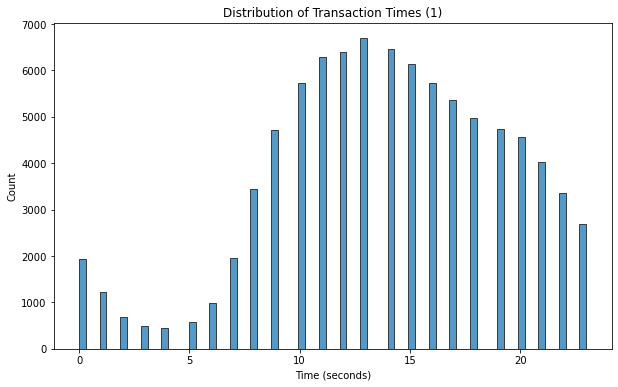

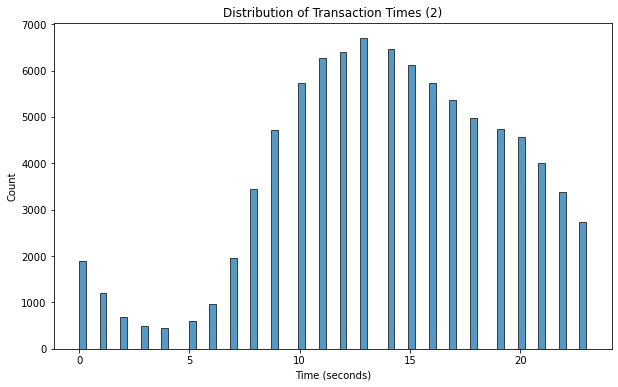

TRN_TYPE
LEGIT    0.977102
FRAUD    0.022898
Name: proportion, dtype: float64


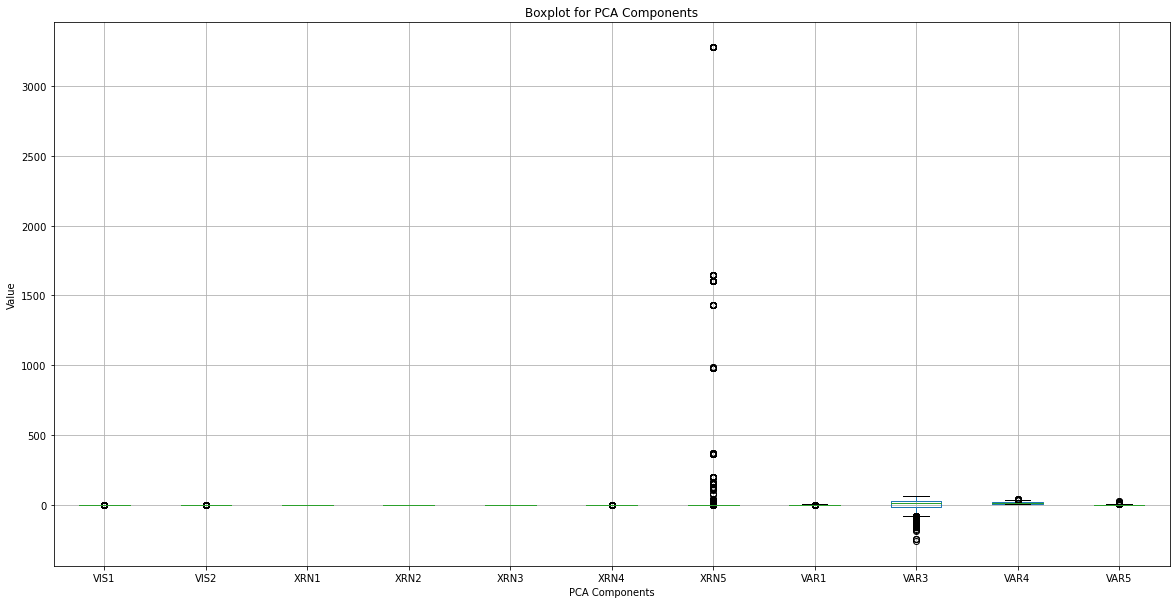

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(data=df1, x='TIME1')
plt.title('Distribution of Transaction Times (1)')
plt.xlabel('Time (seconds)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(data=df1, x='TIME2')
plt.title('Distribution of Transaction Times (2)')
plt.xlabel('Time (seconds)')
plt.ylabel('Count')
plt.show()

print(df1['TRN_TYPE'].value_counts(normalize=True))

plt.figure(figsize=(20,10))
df1.boxplot(column=['VIS1', 'VIS2', 'XRN1', 'XRN2', 'XRN3', 'XRN4', 'XRN5', 'VAR1', 'VAR3', 'VAR4', 'VAR5'])
plt.title('Boxplot for PCA Components')
plt.xlabel('PCA Components')
plt.ylabel('Value')
plt.show()

We can take a better look at the distribution of the PCA vectorized columns by excluding outliers by limiting the y axis.

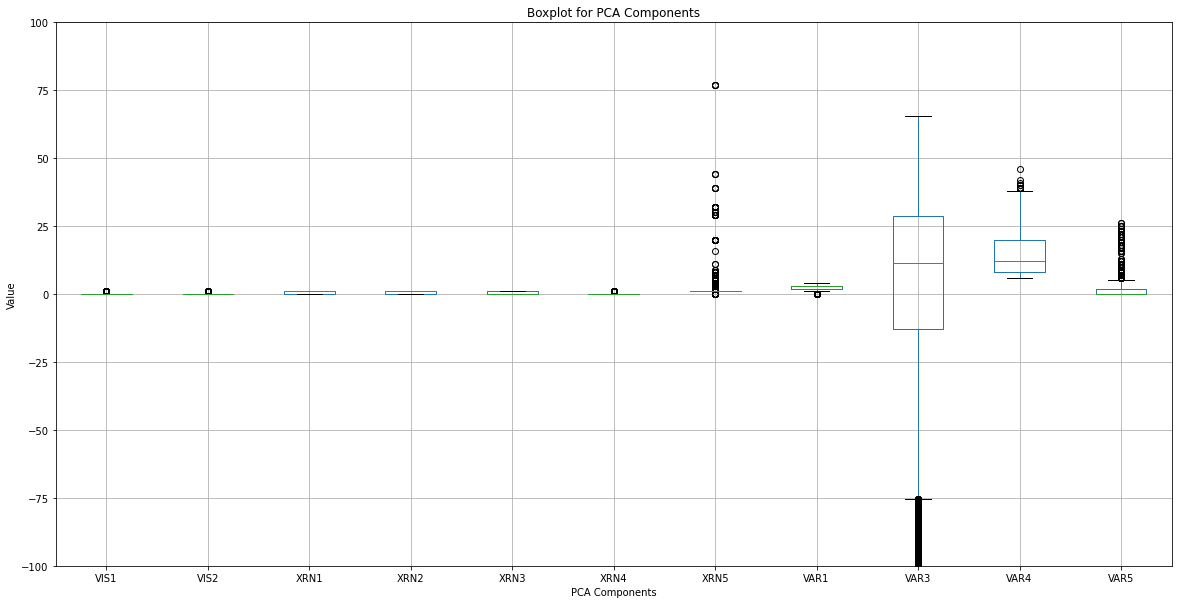

In [32]:
plt.figure(figsize=(20,10))
plt.ylim(-100, 100)
df1.boxplot(column=['VIS1', 'VIS2', 'XRN1', 'XRN2', 'XRN3', 'XRN4', 'XRN5', 'VAR1', 'VAR3', 'VAR4', 'VAR5'])
plt.title('Boxplot for PCA Components')
plt.xlabel('PCA Components')
plt.ylabel('Value')
plt.show()

We can use a heatmap to observe correlations between each column.

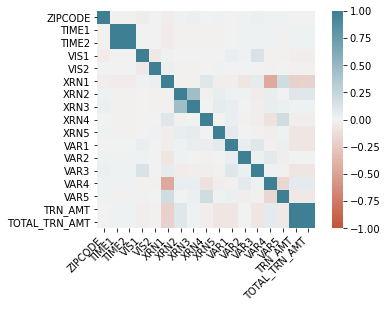

In [33]:
corr = df1.select_dtypes(include='number').corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

However, the heatmap includes only numerical columns because calculating correlation requires columns to be numbers. But we want to see how other non-numerical columns are related to other columns, so we will use category_encoders library to encode the email domain and state abbreviation columns. We decided to use TargetEncoder because we have a relatively large number of unique email domains.

In [34]:
X = df1.drop(['TRN_TYPE'], axis=1)
y = df1['TRN_TYPE']

In [35]:
len(df1['DOMAIN'].unique())

9809

We will also transform 'TRN_TYPE' column to boolean values to facilitate the binary classification formulation.

In [36]:
data = df1.copy()
data['TRN_TYPE'] = data['TRN_TYPE']=='FRAUD'

In [37]:
# %pip install category_encoders

In [38]:
import category_encoders as ce

numeric_columns = ['ZIPCODE', 'TIME1', 'TIME2', 'VIS1', 'VIS2', 'XRN1', 'XRN2', 'XRN3', 'XRN4', 'XRN5', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'TRN_AMT', 'TOTAL_TRN_AMT']
categorical_columns = ['DOMAIN', 'STATE']

encoder = ce.TargetEncoder(cols=['DOMAIN', 'STATE'])
data_encoded = encoder.fit_transform(data.drop(columns=['TRN_TYPE']), data['TRN_TYPE'])

Finally, we can plot the correlation between all columns including the categorical ones. Here, we can see that there are some correlations between 'DOMAIN' and 'STATE', 'STATE' and 'ZIPCODE', 'TIME1' and 'TIME2', 'XRN2' and 'XRN3', 'XRN1' and 'VAR4', and 'TRN_AMT' and 'TOTAL_TRN_AMT'. However, we exclude the correlation between 'TIME1' and 'TIME2' and 'TRN_AMT' and 'TOTAL_TRN_AMT' as these pairs of features seem to be almost identical to each other.

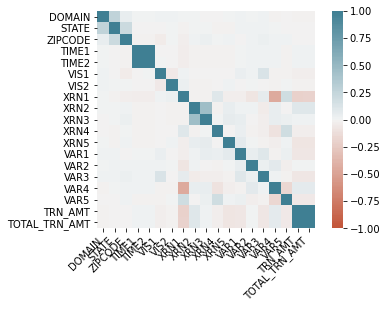

In [39]:
corr = data_encoded.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Now, we try various classifiers with default parameters to see if they perform well with our dataset. We will try relatively simple classifiers since we don't have many features in our dataset and we don't want to overfit to them. Therefore we are trying Random Forest, XGBoost, Gaussian Naive Bayes, linear, SVM, classifiers, and we will combine the three best performing classfiers to build our custom ensemble classifier model.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data_encoded, data.TRN_TYPE, test_size=0.2, random_state=42)

              precision    recall  f1-score   support

       False       0.99      0.96      0.98     17490
        True       0.26      0.52      0.35       433

    accuracy                           0.95     17923
   macro avg       0.62      0.74      0.66     17923
weighted avg       0.97      0.95      0.96     17923



<AxesSubplot:>

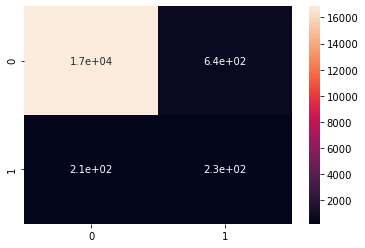

In [41]:
RF_clf = RandomForestClassifier(n_estimators = 150, criterion = 'gini', max_depth=12, 
                             class_weight='balanced', max_features=6)
RF_clf.fit(X_train, y_train)
y_pred_RF = RF_clf.predict(X_test)
print(classification_report(y_test, y_pred_RF))
cm = confusion_matrix(y_test, y_pred_RF)
sns.heatmap(cm, annot=True)

In [19]:
#%pip install xgboost

XGBoost allows us to see the most 

              precision    recall  f1-score   support

       False       0.98      1.00      0.99     17490
        True       0.66      0.18      0.29       433

    accuracy                           0.98     17923
   macro avg       0.82      0.59      0.64     17923
weighted avg       0.97      0.98      0.97     17923



<AxesSubplot:>

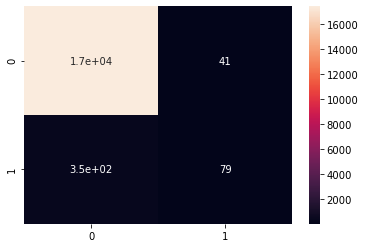

In [42]:
from xgboost import XGBClassifier

XGB_clf = XGBClassifier(n_estimators=10, max_depth=5, learning_rate=1, objective='binary:logistic')
XGB_clf.fit(X_train, y_train)
y_pred = XGB_clf.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

<AxesSubplot:>

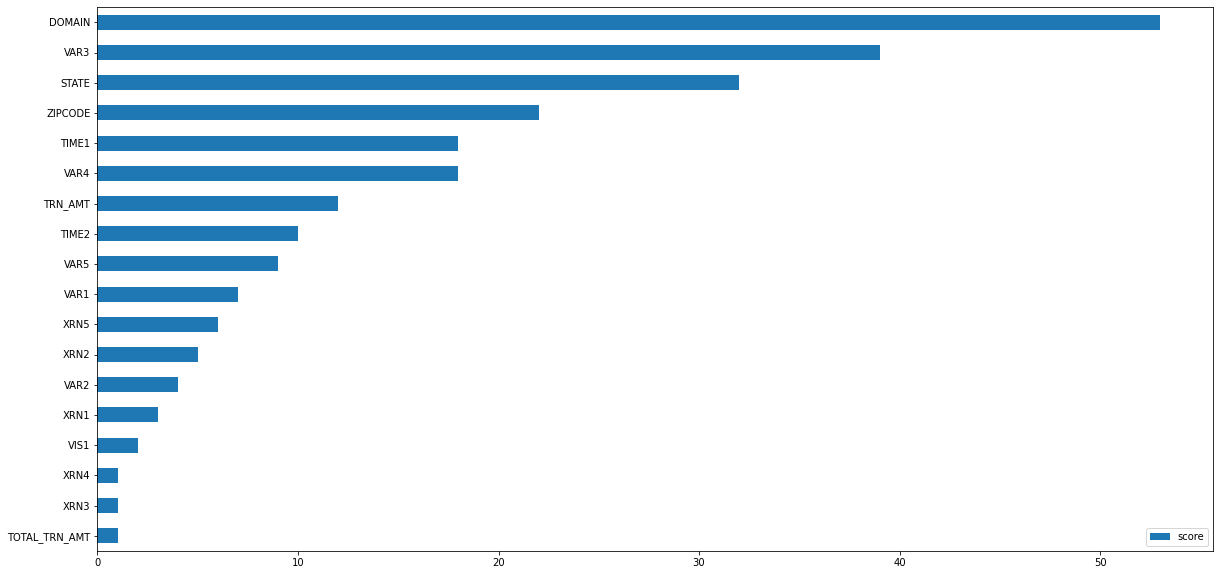

In [50]:
feature_important = XGB_clf.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

xgb_features = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by="score", ascending=False)
top_features = xgb_features.nlargest(40, columns="score").iloc[::-1]
top_features.plot(kind='barh', figsize=(20, 10))

From the graph, we can see the email domain, 'VAR3', and state are the 3 most important features in the XGBoost classifier

              precision    recall  f1-score   support

       False       0.98      1.00      0.99     17490
        True       0.66      0.18      0.29       433

    accuracy                           0.98     17923
   macro avg       0.82      0.59      0.64     17923
weighted avg       0.97      0.98      0.97     17923



<AxesSubplot:>

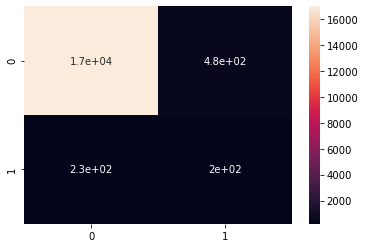

In [21]:
from sklearn.naive_bayes import GaussianNB

GNB_clf = GaussianNB()
GNB_clf.fit(X_train, y_train)  
y_pred_GNB = GNB_clf.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred_GNB)
sns.heatmap(cm, annot=True)

In [43]:
#%pip install imblearn

              precision    recall  f1-score   support

       False       0.99      0.82      0.89     17490
        True       0.08      0.62      0.14       433

    accuracy                           0.81     17923
   macro avg       0.53      0.72      0.52     17923
weighted avg       0.97      0.81      0.88     17923



<AxesSubplot:>

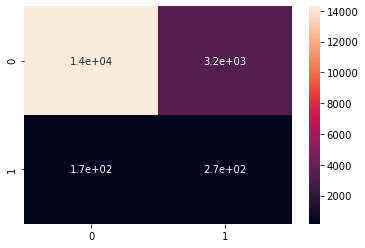

In [23]:
from imblearn.ensemble import BalancedRandomForestClassifier

bal_RF_clf = BalancedRandomForestClassifier(sampling_strategy="auto", replacement=True, max_depth=2, bootstrap=True)
bal_RF_clf.fit(X_train, y_train)
y_pred = bal_RF_clf.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

              precision    recall  f1-score   support

       False       0.98      1.00      0.99     17490
        True       0.69      0.15      0.25       433

    accuracy                           0.98     17923
   macro avg       0.83      0.58      0.62     17923
weighted avg       0.97      0.98      0.97     17923



<AxesSubplot:>

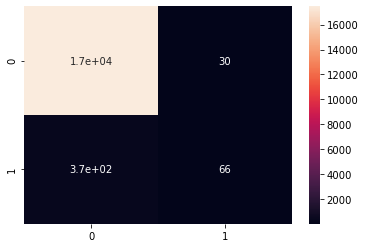

In [24]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

lin_clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e3))
lin_clf.fit(X_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])
y_pred = lin_clf.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

              precision    recall  f1-score   support

       False       0.98      1.00      0.99     17490
        True       0.83      0.13      0.22       433

    accuracy                           0.98     17923
   macro avg       0.91      0.56      0.60     17923
weighted avg       0.98      0.98      0.97     17923



<AxesSubplot:>

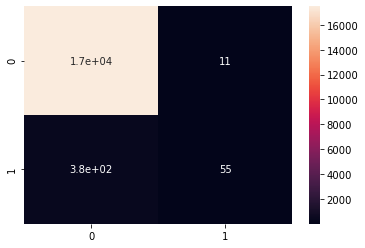

In [25]:
from sklearn.svm import SVC

SVM_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
SVM_clf.fit(X_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])
y_pred = SVM_clf.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

We will create an ensemble classifier with the three best performing classifiers so far: random forest, XGBoost, and bayes classifiers.

              precision    recall  f1-score   support

       False       0.99      0.98      0.98     17490
        True       0.34      0.44      0.39       433

    accuracy                           0.97     17923
   macro avg       0.67      0.71      0.68     17923
weighted avg       0.97      0.97      0.97     17923



<AxesSubplot:>

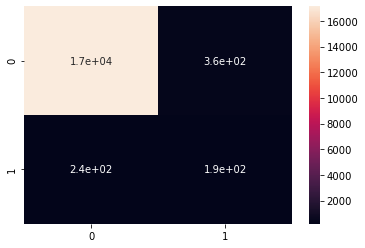

In [26]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('rf', RF_clf), ('gnb', GNB_clf), ('xgb', XGB_clf)], voting='hard')
eclf.fit(X_train, y_train)
y_pred = eclf.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

Because our custom ensemble classifier performs the best among the models we have tried, we will go ahead and find hyperparameters for our custom ensemble.

In [27]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_params = {
    'rf__n_estimators': [100, 150, 200],
    'rf__max_depth': [10, 12, 14],
    'rf__max_features': [4, 6, 8]
}

xgb_params = {
    'xgb__n_estimators': [5, 10, 15],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.1, 0.5, 1]
}

param_grid = {**rf_params, **xgb_params}

eclf = VotingClassifier(estimators=[('rf', RF_clf), ('gnb', GNB_clf), ('xgb', XGB_clf)], voting='hard')

grid_search = GridSearchCV(estimator=eclf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

In [28]:
import pickle

In [29]:
# with open('best_model.pkl', 'wb') as f:
#     pickle.dump(best_model, f)
# with open('grid_search_results.pkl', 'wb') as f:
#     pickle.dump(grid_search, f)

In [30]:
with open('best_model.pkl', 'rb') as f:
    pkl = pickle.load(f)
with open('grid_search_results.pkl', 'rb') as f:
    loaded_grid_search = pickle.load(f)

In [32]:
best_params = loaded_grid_search.best_params_
best_score = loaded_grid_search.best_score_

print("Best parameters: ", best_params)
print("Best score: ", best_score)
best_model = loaded_grid_search.best_estimator_
best_model

Best parameters:  {'rf__max_depth': 14, 'rf__max_features': 8, 'rf__n_estimators': 200, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__n_estimators': 10}
Best score:  0.969954364404062


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=14,
                                                     max_features=8,
                                                     n_estimators=200)),
                             ('gnb', GaussianNB()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval...
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=10, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))])

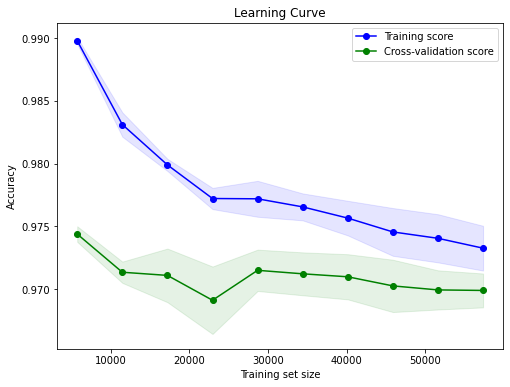

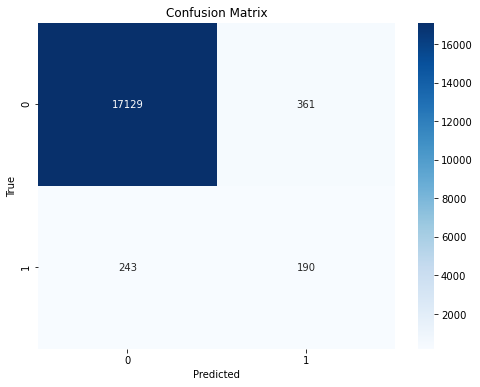

              precision    recall  f1-score   support

       False       0.99      0.98      0.98     17490
        True       0.35      0.41      0.38       433

    accuracy                           0.97     17923
   macro avg       0.67      0.69      0.68     17923
weighted avg       0.97      0.97      0.97     17923



In [33]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(loaded_grid_search.best_estimator_, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='green', label='Cross-validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color='green')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

y_pred = loaded_grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

## Result

The primary objective of this project was to develop a model capable of effectively detecting credit card fraud. Various classification algorithms were explored, including Random Forest, XGBoost, Gaussian Naive Bayes, Balanced Random Forest, Stochastic Gradient Descent, and Support Vector Machines.
An ensemble model combining the Random Forest, XGBoost, and Gaussian Naive Bayes classifiers using hard voting demonstrated the best performance. Hyperparameter tuning was performed on this ensemble model using GridSearchCV. The optimal parameters identified were:

**Random Forest**: n_estimators: 200, max_depth: 14, max_features: 8

**XGBoost**: n_estimators: 10, max_depth: 7, learning_rate: 0.1

The confusion matrix reveals that out of 433 fraudulent transactions in the test set, the model correctly identified 177 of them, resulting in a recall of 41%. However, 256 fraudulent transactions remained undetected by the model. The model exhibited very high precision (0.99) and recall (0.98) for non-fraudulent transactions.


## Conclusion

Developing an effective fraud detection model presents significant challenges due to the highly imbalanced nature of the data, with fraudulent transactions constituting a very small minority.
The ensemble model developed in this project achieves a high overall accuracy of 97% but only detects 41% of fraudulent transactions. While the model succeeds in minimizing false positives, it allows a considerable number of fraudulent transactions to pass through undetected.
In the context of a fraud detection system, recall holds greater importance than precision. The failure to detect a fraudulent transaction bears more severe consequences than flagging some legitimate transactions for additional manual review. There remains room for improvement in the model's ability to identify fraudulent transactions.

Potential avenues for future research and development include:

* Gathering a larger dataset, particularly with more examples of fraudulent transactions, to enhance the model's capacity to learn fraud patterns

* Conducting feature engineering to create new predictive features

* Exploring alternative resampling techniques to address the class imbalance

* Investigating anomaly detection algorithms that may be better suited for this highly imbalanced scenario

This project demonstrates the development of a machine learning pipeline for fraud detection, encompassing data preprocessing, model training, hyperparameter tuning, and evaluation. The results highlight the intricacies involved and emphasize the necessity for continuous iteration and refinement in constructing effective fraud detection systems.
